- title: Introduction to Distributions 
- tags: distributions, statistics
- date: 2018-12-3

## What's a Distribution, Anyway?

Statistics people often talk about distributions, like a normal distribution. Here's what they mean: suppose you could see all of the instances of the thing you're trying to study. What kind of pattern would their values have? That's the distribution.

For example, suppose you expect that most of the values of the thing you care about will be clustered around some average value. IQ is a good example: most IQs in the population are around 100, and then as values get further away from 100 in either direction, the fraction of the total number of instances that takes that range of values gets smaller. There are lots of folks with an IQ between 85 and 115, fewer between 70 and 85 on one side, and 115 and 130, many fewer between 55 and 70 or 130 and 145, and a (proportionally) truly tiny number between 40-55 or 145-160. 

As it turns out, what I just described is a normal distribution---IQs follow it. For reasons to be explained later, lots of distributions follow it. But before we dig into the normal, let's say a bit more about distributions in the abstract. 

There's a good bit of underlying mathematics to describe distributions, but it requires calculus, and won't be necessary for the introductory level of this course. That being said, you'll probably see some of this terminology elsewhere, so I'll give you a quick vocabulary list: 

**Continuous distribution**: A distribution where the thing you care about can take any value in its range. The normal distribution is an example of a continuous distribution. Think about the distribution of incomes (which, incidentally, are *not* typically normally distributed), where 

**Discrete distribution**: A distribution where the thing you care about can take a discrete number of values.

**Probability Density Function (PDF)**: The function that describes the curve of a continuous distribution. If you've seen the famously scary normal distribution equation, with, like, e, and a square root, and all kinds of other craziness floating around, that's a PDF. Don't worry about it, though.  We won't be using this directly in class.

**Probability Mass Function (PMF)**: Like a PDF, but for a discrete distribution.

**Cumulative Density Function**: A much more readily understandable concept, basically, you plug in a value to a CDF and get the probability of seeing a value less than or equal to that. Hence the cumulative part. For those who remember calculus, the CDF is just the integral of the PDF. Again, we won't be working with this directly. There's also a CDF of discrete variables, which works the same except it's a sum rather than an integral, and sometimes people write "cumulative distribution function" instead of density (sometimes).  (For that matter, sometimes they write "distribution" for the continuous one too. Stats people. Sigh. 

### Normal distributions 

The normal distribution is the famous bell-shaped curve, sometimes also called a "Gaussian" distribution. Let's plot one.

The first thing you need to know is that a normal distribution is defined by two *parameters*---the mean of the distribution, traditionally represented by the greek letter mu ($\mu$) and the *standard deviation* (which is a measure of how spread out it is, we'll talk more about this later), traditionally represented by the greek letter sigma ($\sigma$). 

One sensible way to plot a normal distribution would be to just draw a bunch of data randomly from that distribution and plot a histogram. As it turns out, basically every stats library has one built in, so let's use the scipy library to grab a lot of points. Say, a hundred thousand, because, what the heck, computers can count fast.  

We can get a bunch of random values from a distribution by calling `scipy.stats.norm.rvs(mu, sigma, num_values)`

In this case, let's use the *standard normal*, namely, a normal distribution with mean of 0 and standard deviation of 1. This is something you'll be seeing a lot of later on, a lot of stuff in stats is based on it. 


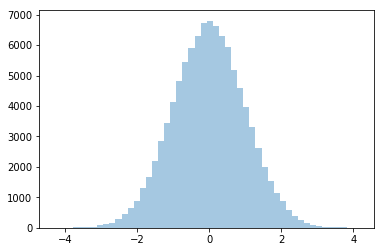

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
np.random.seed(10)

mu = 0
sigma = 1 

random_data = stats.norm.rvs(0, 1, 100000)
sns.distplot(random_data, kde=False)

You can see that the simulated data follows the familiar bell-shaped curve.  (Incidentally, the `np.random.seed()` function just ensures that the random numbers will be generated the same way on repeated runs. Talk to me in class if you want to know more detail about what's going on there. But this is a good thing to set to make sure you can reproduce things that rely on computer-generated randomness... which is really pseudo-randomness but is good enough.)


Note that, as you might expect for random drawa from a distribution, you can be quite confident that a big number like 100,000 will fit the classic curve, but the nature of randomness is that it might not happen with smaller numbers. For example, suppose we just took fifty draws: 

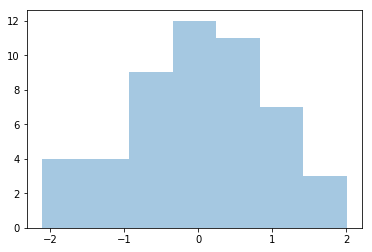

In [2]:
tiny_random_data = stats.norm.rvs(0, 1, 50)
sns.distplot(tiny_random_data, kde=False)

You can see that this sort of looks like the bell-shaped curve, but, because we didn't have a lot of values, it didn't smooth out... so there are noticably more large values than small ones.

We can also use python plotting mojo to directly plot the PDF on top of our histogram and see how close it is. 

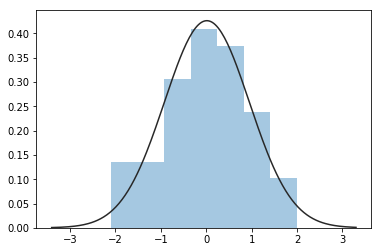

In [3]:
sns.distplot(tiny_random_data, kde=False, fit=stats.norm)

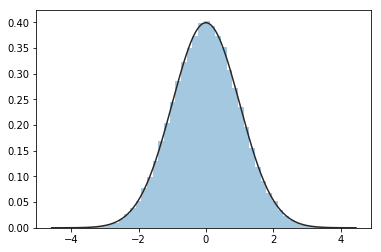

In [4]:
sns.distplot(random_data, kde=False, fit=stats.norm)

Here's a fact about the normal distribution that you should just memorize. 95% of the data will be within 1.96 standard deviations of the mean on either side. Equivalently, this means that with the standard normal (mean of 0, standard deviation of 1), only about 2.5% of the data will be above 1.96, and 2.5% of the data will be below -1.96.   

This turns out to be the basis for a bunch of classical statistics, because of some fabulous properties about how data works in the wild that we'll look at later. For now, just memorize that fact.  

Here's a visualization to help you remember this. The shaded areas are the points above 1.96 and below -1.96.  Don't worry about this code right now.

In [5]:
def shade_percentiles(mean = 0, sigma = 1, tail=2, p=0.05):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    x = np.linspace(-5, 5, 5000)
    y = stats.norm.pdf(x, mean, sigma) 
    ax.plot(x, y)
    if tail == 1:
        critical_value = stats.norm.ppf(1-p, loc=mean, scale=sigma)
        cond = x > critical_value
        z = x[cond]
        ax.fill_between(z, 0, stats.norm.pdf(z, mu, sigma))
    else:
        left_p = p / 2
        right_p = 1 - left_p
        right_critical = stats.norm.ppf(right_p, loc=mean, scale=sigma)
        cond1 = x >  right_critical
        left_critical = stats.norm.ppf(left_p, loc=mean, scale=sigma)
        cond2 = x < left_critical
        z1 = x[cond1]
        z2 = x[cond2] 
        ax.fill_between(z2, 0, stats.norm.pdf(z2, mu, sigma))
        ax.fill_between(z1, 0, stats.norm.pdf(z1, mu, sigma))
    return fig

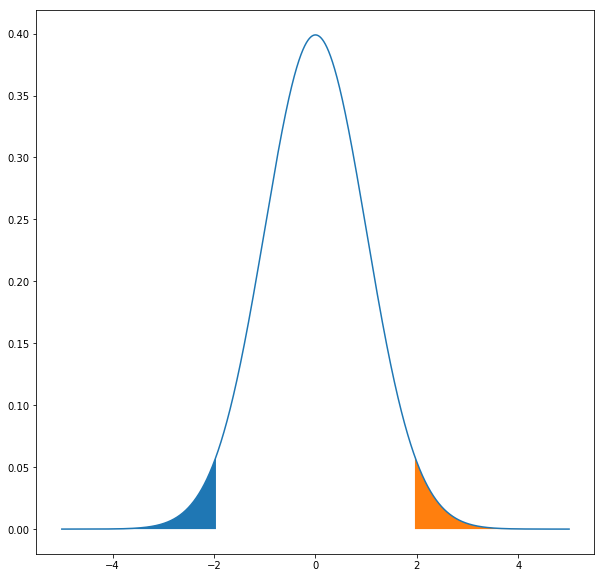

In [6]:
normal_95 = shade_percentiles()

Translating that in terms of our histogram---when we drew 100,000 random numbers from the normal distribution, we would expect that roughly 95,000 of them were within -1.96 and 1.96. 

I can prove that to you. Numpy, the Python numerics library, allows us to filter an array (a specialized list) of numbers by a condition, so we can see how many of the random numbers we got fell within that range.

In [7]:
middle_of_distribution = random_data[(random_data <= 1.96) & (random_data >= -1.96)]
len(middle_of_distribution)

95007

As expected, the actual random draws are a little bit off the expected values, but only a tiny bit, because we had a lot of draws.

Other fun facts about normal distributions: 68% of a normal distribution falls 1 standard deviation from the mean in either direction. 

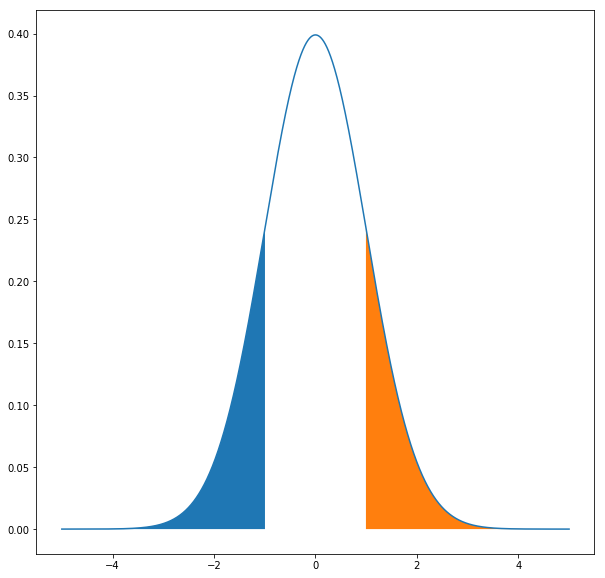

In [8]:
normal_1sd = shade_percentiles(p=.32)

So, for example, supposedly the mean of male adult heights in the U.S. is about 69 inches, and the standard deviation is about 3 inches.  So 68% of men will be between 66 and 72 inches, and then just over 95% of men will be between 63 and 75 inches ("just over" because recall that 95% is 1.96 standard deviations from the mean, not 2). 

We'll see lots more of the normal distribution. But for now let's look at another important distribution or two. 

Economists usually say that income follows a log-normal distribution. Let's look at the shape of that: 

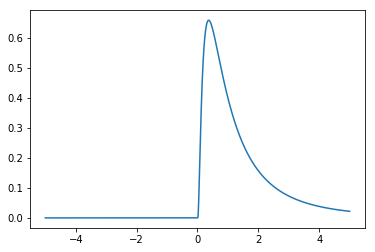

In [9]:
x = np.linspace(-5, 5, 5000)
lognorm_y = stats.lognorm.pdf(x, 1) 
plt.plot(x, lognorm_y)

Mathematically, the lognorm is what the name sounds like---the logarithm of the underlying instance values are normally distributed.  Let's see that: 

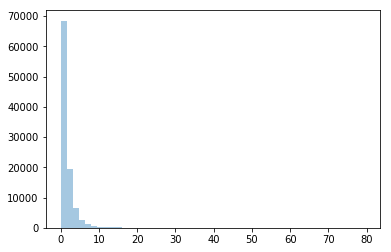

In [10]:
random_lognormal_data = stats.lognorm.rvs(1, size=100000)
sns.distplot(random_lognormal_data, kde=False)

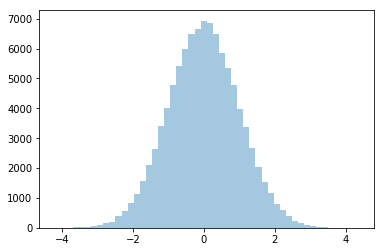

In [11]:
sns.distplot(np.log(random_lognormal_data), kde=False)

Incidentally, economists often use the log of income rather than income in their models, partly to take advantage of some of the properties of normal data. 

Also, think for a minute about the shape of that lognormal curve.  It makes sense, right?  There are lots more poor people than rich people. 

How about another distribution. If you took AP stats or an introductory stats class in college, you probably heard of the chi-squared test. Well, there's a distribution underneath it. Here's what it looks like: 

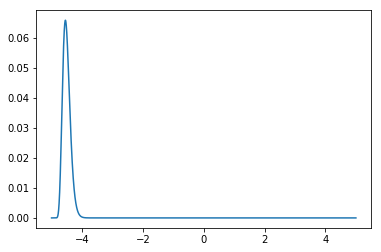

In [12]:
chisq_x = np.linspace(-5, 500, 5000)
chisq_y = stats.chi2.pdf(chisq_x, 20) 
plt.plot(x, chisq_y)

The parameter there is known as the degrees of freedom, which you probably learned about.  Let's look at it with different degrees of freedom. 

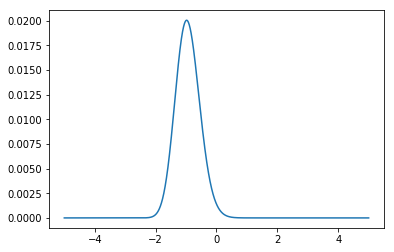

In [13]:
plt.plot(x, stats.chi2.pdf(chisq_x, 200))

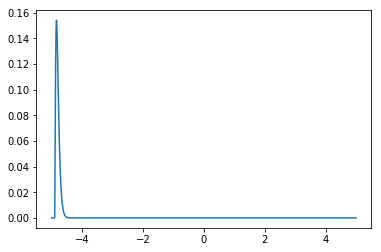

In [14]:
plt.plot(x, stats.chi2.pdf(chisq_x, 5))

If you're interested in reading more, [this blog post](https://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/) has a nice description of some of the common distibutions. 

That's all for now.  We're going to dig into the normal distribution and the superpowers it gives us shortly. 